In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


In [2]:
crypto_data = 'Instructions/crypto_data.csv'
crypto_df = pd.read_csv(crypto_data)

In [3]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
crypto_df = crypto_df.loc[crypto_df['IsTrading']==True]

array([ True])

In [14]:
drop_columns = ['IsTrading']
crypto_df = crypto_df.drop(drop_columns,axis=1)

In [15]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [17]:
crypto_df = crypto_df.dropna()

In [19]:
crypto_df.isna().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [37]:
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined']>0]
crypto_df['TotalCoinSupply'] = pd.to_numeric(crypto_df['TotalCoinSupply'])
crypto_df = crypto_df.loc[crypto_df['TotalCoinSupply']>0]


In [43]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,8.400000e+07
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2.000000e+09
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1.400223e+09
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,2.100000e+07


In [42]:
cryp_df = crypto_df.drop(['CoinName','Unnamed: 0'],axis=1)

In [44]:
cryp_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [45]:
crypto2_df = pd.get_dummies(cryp_df)

In [62]:
len(crypto2_df.columns)

95

In [47]:
crypto_scaled = StandardScaler().fit_transform(crypto2_df)

In [48]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [49]:
pca = PCA(n_components=0.90)

In [50]:
crypto_pca = pca.fit_transform(crypto_scaled)

In [63]:
crypto_pca_df = pd.DataFrame(data=crypto_pca)
len(crypto_pca_df.columns)

72

In [64]:
from sklearn.manifold import TSNE

In [65]:
tsne = TSNE(learning_rate=35)

In [66]:
tsne_features = tsne.fit_transform(crypto_pca_df)

In [67]:
tsne_features.shape

(497, 2)

In [70]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_df['y'] = tsne_features[:,1]

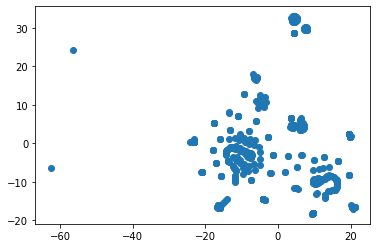

In [72]:
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

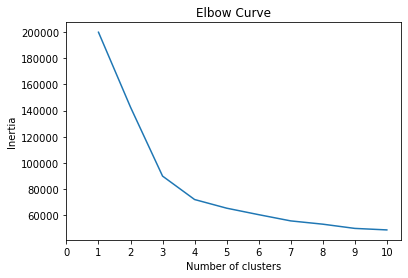

In [73]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [74]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(crypto_pca_df)

# Predict clusters
predictions = model.predict(crypto_pca_df)

# Add the predicted class column to the dataframe
crypto_pca_df["class"] = model.labels_
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,x,y,class
0,-0.317149,0.966021,-0.607129,0.001605,2.071868e-14,-3.795141e-14,1.897452e-13,-0.013538,-1.357840,-0.350486,...,-3.727265e-16,-1.647142e-15,-2.638978e-15,-7.466238e-15,-2.046233e-15,-5.739822e-15,-4.466847e-15,9.579866,-9.847417,0
1,-0.300967,0.966071,-0.607450,0.001594,2.004615e-14,-3.828965e-14,1.902457e-13,-0.014152,-1.359429,-0.351135,...,-1.079190e-15,-1.446440e-15,-3.986042e-15,-8.036618e-15,-5.812405e-16,-4.966532e-15,-2.388603e-15,15.997211,-11.698936,0
2,2.255810,1.612916,-0.703654,0.004871,3.309569e-14,-5.833385e-14,6.261739e-13,-0.067299,-1.253009,-0.393251,...,-2.704179e-14,7.092867e-14,1.268358e-13,1.471585e-13,1.795559e-14,1.493466e-13,-6.899450e-14,20.104200,-15.987916,0
3,-0.156609,-1.242977,0.204219,-0.001275,-8.999974e-15,1.626475e-14,-1.667620e-13,-0.001907,0.301390,0.115557,...,-2.359215e-14,-1.090475e-15,1.922313e-14,2.106475e-14,1.139809e-14,2.470400e-14,-2.192571e-14,4.640308,31.651995,3
4,-0.183111,-1.147414,0.023095,-0.000654,-2.780826e-15,5.299101e-15,-8.737962e-14,0.011802,-0.330384,-0.120865,...,5.049131e-15,2.306758e-15,1.728465e-15,-5.910803e-16,-2.656685e-15,-2.829342e-15,-1.209242e-15,-12.016904,-1.234739,1


In [78]:
crypto_pca_df['class'].nunique

<bound method IndexOpsMixin.nunique of 0      0
1      0
2      0
3      3
4      1
      ..
492    1
493    0
494    1
495    1
496    2
Name: class, Length: 497, dtype: int32>